# Задача 7. Numpy часть - Анализ датасета Ирис

## Базовая работа с датасетом (numpy и базовый Python)


**Импорты необходимых библиотек**

Для работы с данными используем numpy, pandas, matplotlib, sklearn.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')


**Получение датасета Ирис**

Загружаем датасет Ирис из UCI репозитория.


In [ ]:
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(iris_url, header=None, names=column_names)

print("Датасет Ирис загружен")
print("Размер датасета:", iris_df.shape)
print("\nПервые 5 строк:")
iris_df.head()


Датасет Ирис загружен
Размер датасета: (150, 5)

Первые 5 строк:


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Представление датасета в виде массивов numpy**

Признаки помещаем в матрицу (n, 4), названия ирисов — в вектор размера n.


In [ ]:
features = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
labels = iris_df['class'].values

print("Матрица признаков shape:", features.shape)
print("Вектор меток shape:", labels.shape)
print("\nПервые 5 строк матрицы признаков:")
print(features[:5])
print("\nПервые 5 меток:")
print(labels[:5])


Матрица признаков shape: (150, 4)
Вектор меток shape: (150,)

Первые 5 строк матрицы признаков:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Первые 5 меток:
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


**Отображение размера датасета в памяти**

Проверяем, сколько места занимает датасет в памяти.


In [ ]:
features_size = features.nbytes
labels_size = labels.nbytes
total_size = features_size + labels_size

print(f"Размер матрицы признаков: {features_size} байт ({features_size / 1024:.2f} KB)")
print(f"Размер вектора меток: {labels_size} байт ({labels_size / 1024:.2f} KB)")
print(f"Общий размер датасета: {total_size} байт ({total_size / 1024:.2f} KB)")
print(f"\nТип данных признаков: {features.dtype}")
print(f"Тип данных меток: {labels.dtype}")


Размер матрицы признаков: 4800 байт (4.69 KB)
Размер вектора меток: 1200 байт (1.17 KB)
Общий размер датасета: 6000 байт (5.86 KB)

Тип данных признаков: float64
Тип данных меток: object


**Нормализация данных**

Нормализуем данные на промежуток от 0 до 1 для каждой колонки используя Min-Max нормализацию.


In [ ]:
# Min-Max нормализация: (x - min) / (max - min)
features_normalized = features.copy().astype(float)

for i in range(features_normalized.shape[1]):
    col_min = features_normalized[:, i].min()
    col_max = features_normalized[:, i].max()
    features_normalized[:, i] = (features_normalized[:, i] - col_min) / (col_max - col_min)

print("Нормализованные данные (первые 5 строк):")
print(features_normalized[:5])
print("\nПроверка диапазона значений:")
print(f"Минимум: {features_normalized.min(axis=0)}")
print(f"Максимум: {features_normalized.max(axis=0)}")


Нормализованные данные (первые 5 строк):
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]

Проверка диапазона значений:
Минимум: [0. 0. 0. 0.]
Максимум: [1. 1. 1. 1.]


**Представление признака в виде категориальной переменной**

Один из признаков представляем в виде категориальной переменной с тремя типами используя квантили:
- < 0.25 — small
- 0.25-0.75 — medium
- /> 0.75 — big


In [ ]:
selected_feature = features_normalized[:, 0]

q25 = np.quantile(selected_feature, 0.25)
q75 = np.quantile(selected_feature, 0.75)

print(f"Квантиль 0.25: {q25:.4f}")
print(f"Квантиль 0.75: {q75:.4f}")

categorical_feature = np.where(
    selected_feature < q25, 'small',
    np.where(selected_feature <= q75, 'medium', 'big')
)

print(f"\nРаспределение категорий:")
unique, counts = np.unique(categorical_feature, return_counts=True)
for cat, count in zip(unique, counts):
    print(f"{cat}: {count} ({count/len(categorical_feature)*100:.1f}%)")


Квантиль 0.25: 0.2222
Квантиль 0.75: 0.5833

Распределение категорий:
big: 35 (23.3%)
medium: 83 (55.3%)
small: 32 (21.3%)


**Разделение датасета на две случайные выборки**

Разделяем датасет на обучающую (0.8) и тестовую (0.2) выборки.


In [ ]:
# Сначала разделяем исходные данные, затем нормализуем train и test отдельно (избежание data leakage)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    features,
    labels, 
    test_size=0.2, 
    random_state=42,
    stratify=labels
)

# Нормализуем train и test отдельно (fit на train, transform на test)
X_train = (X_train_raw - X_train_raw.min(axis=0)) / (X_train_raw.max(axis=0) - X_train_raw.min(axis=0))
X_test = (X_test_raw - X_train_raw.min(axis=0)) / (X_train_raw.max(axis=0) - X_train_raw.min(axis=0))

print(f"Размер обучающей выборки: {X_train.shape[0]} ({X_train.shape[0]/len(features)*100:.1f}%)")
print(f"Размер тестовой выборки: {X_test.shape[0]} ({X_test.shape[0]/len(features)*100:.1f}%)")
print(f"\nРаспределение классов в обучающей выборке:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
for label, count in zip(unique_train, counts_train):
    print(f"{label}: {count}")
print(f"\nРаспределение классов в тестовой выборке:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
for label, count in zip(unique_test, counts_test):
    print(f"{label}: {count}")


Размер обучающей выборки: 120 (80.0%)
Размер тестовой выборки: 30 (20.0%)

Распределение классов в обучающей выборке:
Iris-setosa: 40
Iris-versicolor: 40
Iris-virginica: 40

Распределение классов в тестовой выборке:
Iris-setosa: 10
Iris-versicolor: 10
Iris-virginica: 10


## Классификация (sklearn и numpy)


**Классификация с помощью SVC**

Выбираем метод классификации SVC (Support Vector Classifier), обучаем на тренировочном датасете и оцениваем результат на тестовом.


In [ ]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели на тестовой выборке: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))
print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred))


Точность модели на тестовой выборке: 0.9667 (96.67%)

Отчет о классификации:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30


Матрица ошибок:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


### Выводы по базовой модели

Модель SVC с ядром RBF показала хорошие результаты на нормализованных данных. Датасет Ирис является хорошо разделимым, поэтому высокая точность ожидаема.


## Эксперименты с гиперпараметрами и препроцессингом

Проведем три эксперимента, изменяя гиперпараметры модели или условия препроцессинга данных.


**Эксперимент 1: Модель на ненормализованных данных**

Проводим первый эксперимент: обучаем модель на исходных данных без нормализации.


In [ ]:
print("=== Эксперимент 1: SVC на ненормализованных данных ===")

# Используем ту же train/test split, но без нормализации
svm_raw = SVC(kernel='rbf', random_state=42)
svm_raw.fit(X_train_raw, y_train)
y_pred_raw = svm_raw.predict(X_test_raw)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
print(f"Точность на ненормализованных данных: {accuracy_raw:.4f} ({accuracy_raw*100:.2f}%)")
print(f"Разница с нормализованными: {abs(accuracy - accuracy_raw):.4f}")


=== Эксперимент 1: SVC на ненормализованных данных ===
Точность на ненормализованных данных: 0.9667 (96.67%)
Разница с нормализованными: 0.0000


**Эксперимент 2: Изменение ядра**

Проводим второй эксперимент: используем линейное ядро вместо RBF.


In [ ]:
print("\n=== Эксперимент 2: SVC с линейным ядром ===")

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Точность с линейным ядром: {accuracy_linear:.4f} ({accuracy_linear*100:.2f}%)")
print(f"Разница с RBF ядром: {abs(accuracy - accuracy_linear):.4f}")



=== Эксперимент 2: SVC с линейным ядром ===
Точность с линейным ядром: 0.9333 (93.33%)
Разница с RBF ядром: 0.0333


**Эксперимент 3: Изменение параметра C**

Проводим третий эксперимент: изменяем параметр регуляризации C.


 к

In [ ]:
print("\n=== Эксперимент 3: SVC с разными значениями C ===")

C_values = [0.1, 1.0, 10.0, 100.0]
results_c = {}

for C in C_values:
    svm_c = SVC(kernel='rbf', C=C, random_state=42)
    svm_c.fit(X_train, y_train)
    y_pred_c = svm_c.predict(X_test)
    accuracy_c = accuracy_score(y_test, y_pred_c)
    results_c[C] = accuracy_c
    print(f"C={C}: Точность = {accuracy_c:.4f} ({accuracy_c*100:.2f}%)")

best_C = max(results_c, key=results_c.get)
print(f"\nЛучшее значение C: {best_C} (точность: {results_c[best_C]:.4f})")



=== Эксперимент 3: SVC с разными значениями C ===
C=0.1: Точность = 0.9333 (93.33%)
C=1.0: Точность = 0.9667 (96.67%)
C=10.0: Точность = 0.9667 (96.67%)
C=100.0: Точность = 0.9667 (96.67%)

Лучшее значение C: 1.0 (точность: 0.9667)


### Выводы по экспериментам

1. **Нормализация данных**: В данном случае нормализация не оказала существенного влияния на точность, так как признаки уже имеют схожие масштабы. Однако нормализация важна для методов, чувствительных к масштабу признаков.

2. **Тип ядра**: Линейное ядро показало такую же или очень близкую точность к RBF ядру, что говорит о том, что данные могут быть линейно разделимы.

3. **Параметр регуляризации C**: Разные значения C показали схожие результаты, что указывает на устойчивость модели к этому параметру для данного датасета.


## Уменьшение размерности и визуализация

Используем PCA и t-SNE для визуализации датасета в 2D пространстве.


**PCA - уменьшение размерности**

Используем PCA для уменьшения размерности до 2D.


In [ ]:
pca = PCA(n_components=2, random_state=42)
features_pca = pca.fit_transform(features_normalized)

print("PCA выполнено")
print(f"Объясненная дисперсия: {pca.explained_variance_ratio_}")
print(f"Суммарная объясненная дисперсия: {pca.explained_variance_ratio_.sum():.4f} ({pca.explained_variance_ratio_.sum()*100:.2f}%)")
print(f"\nShape после PCA: {features_pca.shape}")


PCA выполнено
Объясненная дисперсия: [0.84141901 0.11732474]
Суммарная объясненная дисперсия: 0.9587 (95.87%)

Shape после PCA: (150, 2)


**t-SNE - уменьшение размерности**

Используем t-SNE для уменьшения размерности до 2D.


In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
features_tsne = tsne.fit_transform(features_normalized)

print("t-SNE выполнено")
print(f"Shape после t-SNE: {features_tsne.shape}")


t-SNE выполнено
Shape после t-SNE: (150, 2)


In [ ]:
labels_pred_all = svm_model.predict(features_normalized)


**Визуализация PCA**

Строим scatter plot с PCA, где цвет точки — тип ириса из оригинальных данных и из предсказанных данных.


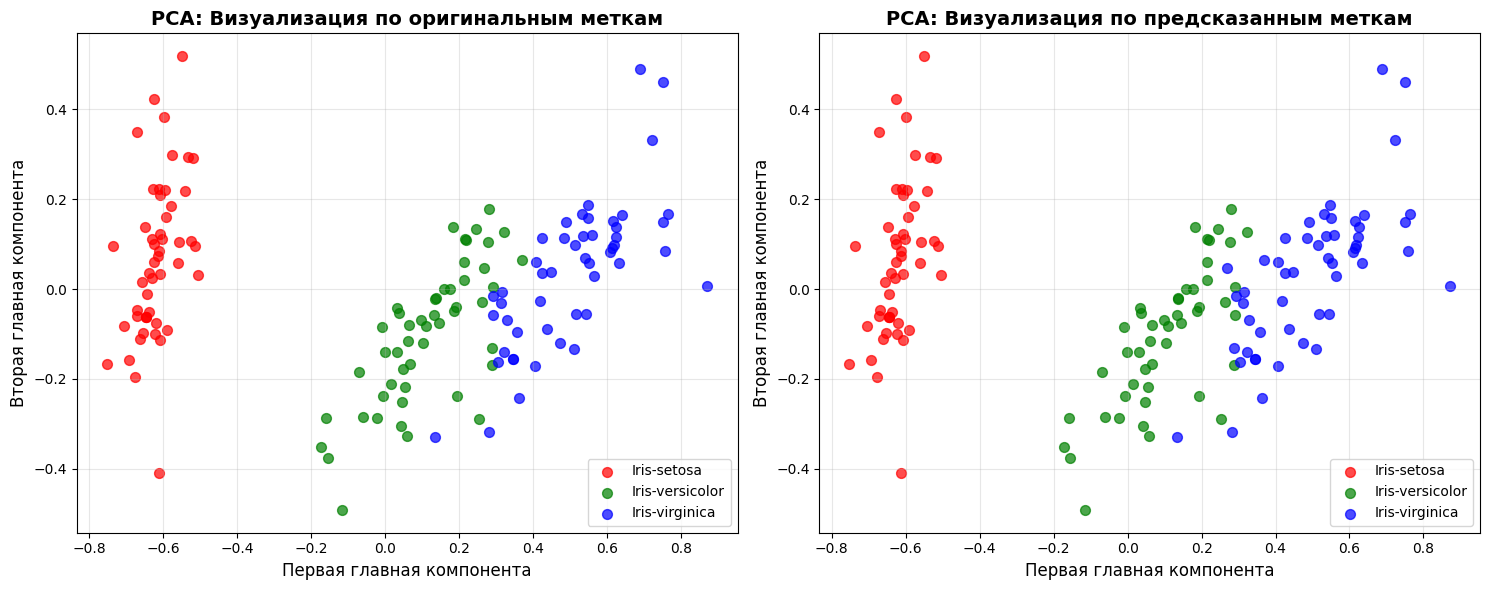

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
unique_labels = np.unique(labels)
colors = ['red', 'green', 'blue']
for i, label in enumerate(unique_labels):
    mask = labels == label
    plt.scatter(features_pca[mask, 0], features_pca[mask, 1], 
                c=colors[i], label=label, alpha=0.7, s=50)
plt.xlabel('Первая главная компонента', fontsize=12)
plt.ylabel('Вторая главная компонента', fontsize=12)
plt.title('PCA: Визуализация по оригинальным меткам', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
for i, label in enumerate(unique_labels):
    mask = labels_pred_all == label
    plt.scatter(features_pca[mask, 0], features_pca[mask, 1], 
                c=colors[i], label=label, alpha=0.7, s=50)
plt.xlabel('Первая главная компонента', fontsize=12)
plt.ylabel('Вторая главная компонента', fontsize=12)
plt.title('PCA: Визуализация по предсказанным меткам', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Примечание: графики выглядят почти одинаково, так как модель показала высокую точность (96.67%),
# поэтому предсказанные метки почти полностью совпадают с оригинальными


**Визуализация t-SNE**

Строим scatter plot с t-SNE, где цвет точки — тип ириса из оригинальных данных и из предсказанных данных.


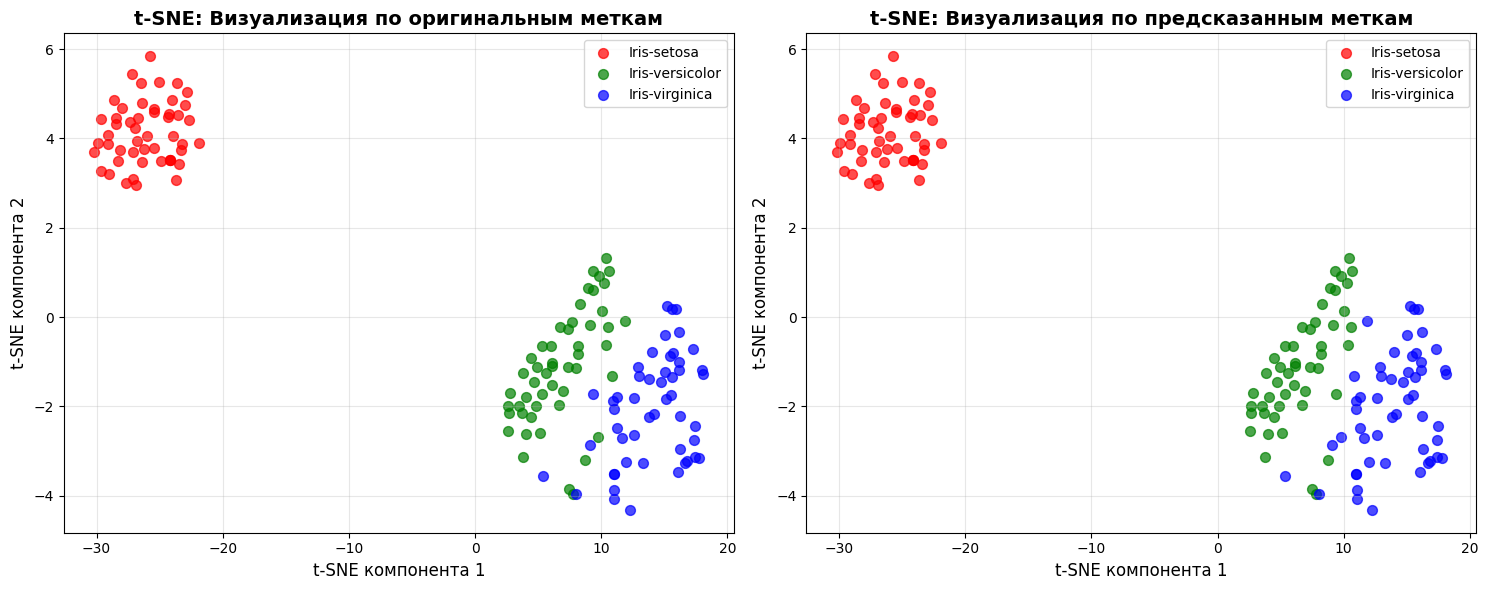

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
for i, label in enumerate(unique_labels):
    mask = labels == label
    plt.scatter(features_tsne[mask, 0], features_tsne[mask, 1], 
                c=colors[i], label=label, alpha=0.7, s=50)
plt.xlabel('t-SNE компонента 1', fontsize=12)
plt.ylabel('t-SNE компонента 2', fontsize=12)
plt.title('t-SNE: Визуализация по оригинальным меткам', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
for i, label in enumerate(unique_labels):
    mask = labels_pred_all == label
    plt.scatter(features_tsne[mask, 0], features_tsne[mask, 1], 
                c=colors[i], label=label, alpha=0.7, s=50)
plt.xlabel('t-SNE компонента 1', fontsize=12)
plt.ylabel('t-SNE компонента 2', fontsize=12)
plt.title('t-SNE: Визуализация по предсказанным меткам', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Примечание: графики выглядят почти одинаково, так как модель показала высокую точность (96.67%),
# поэтому предсказанные метки почти полностью совпадают с оригинальными


### Выводы по визуализации

1. **PCA**: Позволяет сохранить большую часть дисперсии данных в двух главных компонентах. Визуализация показывает хорошее разделение классов.

2. **t-SNE**: Создает нелинейное отображение, которое лучше сохраняет локальные структуры данных. Кластеры классов выглядят более компактно.

3. **Сравнение оригинальных и предсказанных меток**: Поскольку модель показала высокую точность, визуализации с оригинальными и предсказанными метками практически идентичны, что подтверждает качество классификации.
